In [1]:
using Plots
pyplot()
using LinearAlgebra

In [2]:
Ωc(x) = 1.7e4*sin(2pi*x) #in the unit of λ
Δ = 1.7e4
Ωp = 0.16*1.7e4

H(x) = [0 Ωc(x)/2 0; Ωc(x)/2 -Δ  Ωp/2; 0 Ωp/2 0]

H (generic function with 1 method)

## Fig 2a

Easy to recurrent Fig 2a in this PRL.

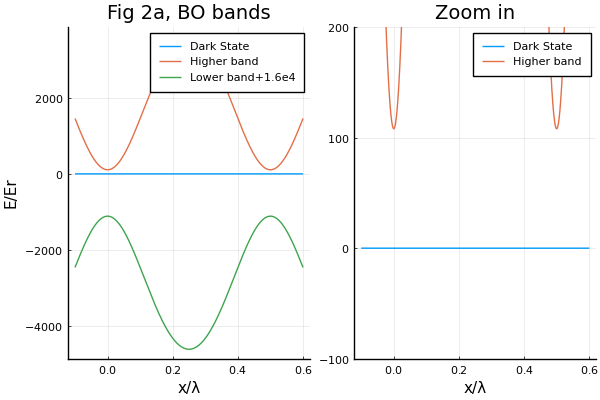

In [7]:
δ= 0.00001
x=[-0.1:δ:0.6;]

V1=eigvals.(H.(x))

V2 = collect(eachrow(reduce(hcat, V1)))  #one-liner to transpose the strange matrix in Julia

p1=plot(x,[V2[2],V2[3]],ylim=(-100,200),xlabel="x/λ",ylabel="", label=["Dark State" "Higher band"],title="Zoom in")

p2=plot(x,[V2[2],V2[3],V2[1].+1.6e4],xlabel="x/λ",ylabel="E/Er", label=[ "Dark State" "Higher band" "Lower band+1.6e4"],
         title="Fig 2a, BO bands")


plot(p2,p1)

In [15]:
function aligned_vecs(x,j)
    band=[];
    for i in 1:length(x)
    push!(band,eigvecs( H(x[i]) )[:,j])
    end
    return band
end

function gauge_trans(x)  # The input is a vector of vector which is the spinor wavefunction components.
    for i in 1:length(x)-1
        if norm(x[i]+x[i+1])<norm(x[i]-x[i+1])
            x[i+1]=-x[i+1]
        end
    end
    return x
end

gauge_trans (generic function with 1 method)

In [16]:
lowband=gauge_trans( aligned_vecs(x,1) )
midband=gauge_trans( aligned_vecs(x,2) )
highband=gauge_trans( aligned_vecs(x,3) )
bands=[lowband,midband,highband];

In [27]:
function vec_pot(δ ,x,bands)
    bands[1] = lowband
    bands[2] = midband
    bands[3] = highband
    l = length(lowband)-1
    A0m = zeros(l)       #0 stands for dark state. m stands for lower band. p stands for higher band.
    A00 = zeros(l)
    A0p = zeros(l)
    Apm = zeros(l)
    [A0m[i]=dot( midband[i],lowband[i+1]-lowband[i] )/δ for i in 1:l ]
    [A00[i]=dot( midband[i],midband[i+1]-midband[i] )/δ for i in 1:l ]
    [A0p[i]=dot( midband[i],highband[i+1]-highband[i] )/δ for i in 1:l ]
    [Apm[i]=dot( lowband[i],highband[i+1]-highband[i] )/δ for i in 1:l ]
    return A0m,A00,A0p,Apm
end

vec_pot (generic function with 1 method)

In [28]:
Ana=vec_pot(δ,x,bands)[3].^2+vec_pot(δ,x,bands)[1].^2;

Aoff=vec_pot(δ,x,bands)[4].*vec_pot(δ,x,bands)[3];

## The result

As shown below, the peak is approximately $E_r/\epsilon^2 \approx 40 E_r$. We recurrent the same results as in 2016 PRL.

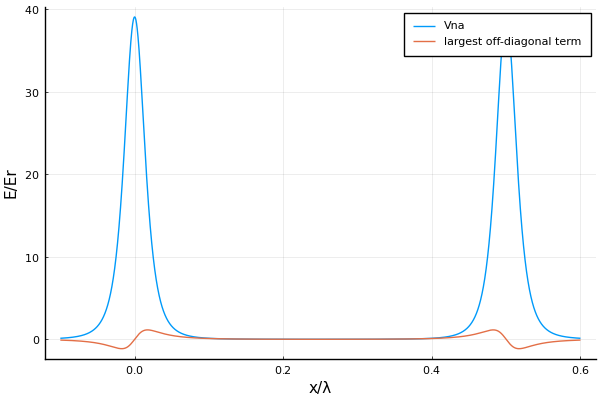

In [29]:
plot(x,Ana ./(2pi)^2,xlabel="x/λ",ylabel="E/Er",label="Vna")
plot!(x,Aoff./(2pi)^2,label="largest off-diagonal term")   

# all the derivatives used here is w.r.t. "x/λ", return to Er unit requires a extra 1/(2π)^2 term

Using the following functions which are the defined in the Supplementary Information, we can also get the same $V_{na}$ analytically.

In [33]:
α(x) = atan(Ωc(x)/Ωp)
α′(x) = 1/(1+(Ωc(x)/Ωp)^2)*(1.7e4*cos(2pi*x)*2pi/Ωp)

E(x)  = sqrt(Ωc(x)^2+Ωp^2)
Ep(x) = (1/2)*(-Δ+sqrt(Ωc(x)^2+Ωp^2+Δ^2) )
Em(x) = (1/2)*(-Δ-sqrt(Ωc(x)^2+Ωp^2+Δ^2) )

ϵp(x) = 2*Ep(x)/E(x)
ϵm(x) = 2*Em(x)/E(x)

Np(x) = 1/sqrt( 1+ϵp(x)^2 )
Nm(x) = 1/sqrt( 1+ϵm(x)^2 )


Nm (generic function with 1 method)

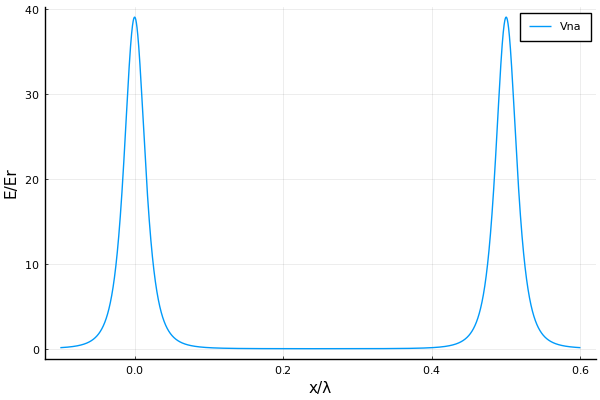

In [37]:
#plot(x,Nm.(x).^2 + Np.(x).^2 )

plot(x,α′.(x) .^2 ./(2pi)^2,ylabel="E/Er",xlabel="x/λ",label="Vna")